In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn import metrics

In [2]:
plt.style.use('dark_background')

# Dataset

In [3]:
data = np.loadtxt('train_clase2.csv',delimiter=',')

In [4]:
colores = ['blue'  if _==1 else 'red' for _ in data[:,2]]

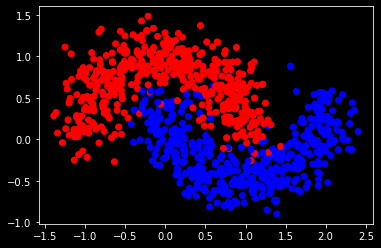

In [5]:
plt.scatter(data[:,0],data[:,1],color=colores)
plt.show()

In [8]:
# Train test split casero
random_index = np.random.permutation(900)
stop_signal = int(0.8*len(data))
train_index = random_index[:stop_signal]
test_index = random_index[stop_signal:len(data)]

In [9]:
# 80% de 900 es 720
X_general = data[:,[0,1]]
y_general = data[:,2]

In [10]:
X = X_general[train_index]
y = y_general[train_index]
X_test = X_general[test_index]
y_test = y_general[test_index]

# De una

In [75]:
def sigmoid(x,der=False):
    if der:
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

In [173]:
W1 = np.random.uniform(-1,1,(3,2))# [3,2]
b1 = np.random.uniform(-1,1,(3,1))# [3,1]
W2 = np.random.uniform(-1,1,(2,3))# [2,2]
b2 = np.random.uniform(-1,1,(2,1))# [2,1]
W3 = np.random.uniform(-1,1,(1,2))# [1,1]
b3 = np.random.uniform(-1,1,(1,1))# [1,1]

batch_size = 200
alpha=0.15
epochs = 20000
W1_record = []
W2_record = []
W3_record = []
b1_record = []
b2_record = []
b3_record = []
error_record = []
for epoch in range(epochs):
    W1_record.append(W1)
    W2_record.append(W2)
    W3_record.append(W3)
    b1_record.append(b1)
    b2_record.append(b2)
    b3_record.append(b3)
    
    for i in range(0,len(X),batch_size):
        end = i + batch_size if i + batch_size <= len(X) else len(X) 

        # Layer 1
        Z1 = W1 @ X[i:end,:].T + b1 # [3,batch_size]
        A1 = sigmoid(Z1) # [3,batch_size]
        #Layer 2
        Z2 = W2 @ A1 + b2 # [2,batch_size]
        A2 = sigmoid(Z2) # [2, bat_size]

        #Layer 3
        Z3 = W3 @ A2 + b3 # [1, batch_size]
        A3 = sigmoid(Z3) # Output [1,batch_size]

        dError = -2*(y[i:end] - A3) # [1,batch_size]

        dZ3 = dError * A3 * (1-A3) # [1,batch_size]
        dW3 = (1/batch_size)*dZ3@A2.T # [1,2]
        db3 = (1/batch_size)*np.sum(dZ3,axis=1,keepdims=True) # [1,1]
        W3 = W3 - alpha*dW3 # [1,2]
        b3 = b3 - alpha*db3 # [1,1]
        

        dZ2 = W3.T@dZ3 * A2 * (1-A2)
        dW2 = (1/batch_size)*dZ2@A1.T # [2,3]
        db2 = (1/batch_size)*np.sum(dZ2,axis=1,keepdims=True)

        W2 += -alpha*dW2 # [2,3]
        b2 += -alpha*db2 # [2,1]

        dZ1 = (W2.T@dZ2)* A1 * (1-A1) # [3,batch_size]
        dW1 = (1/batch_size)*dZ1@X[i:end,:] # [3,2]
        db1 = (1/batch_size)*np.sum(dZ1,axis=1,keepdims=True) # [3,1]
        

        W1 += -alpha*dW1 # [3,2]
        b1 += -alpha*db1 # [3,1]
    error_record.append(np.mean((y[i:end] - A3)**2))

In [174]:
W1,b1,W2,b2,W3,b3

(array([[-0.3458827 ,  1.40448287],
        [ 0.31809865, -1.29887953],
        [-0.36333409,  1.50443058]]),
 array([[0.69889769],
        [0.84547366],
        [0.7225396 ]]),
 array([[ 2.42292628, -2.643664  ,  1.72496861],
        [-0.95785485,  3.27085417, -1.03874704]]),
 array([[-0.57954665],
        [-0.06653392]]),
 array([[-6.93776087,  4.38032724]]),
 array([[1.46446824]]))

In [42]:
def predict_a_mano(X_test):
    first_layer = sigmoid(W1@X_test.T + b1)
    sec_layer = sigmoid(W2@first_layer + b2)
    ter_layer = sigmoid(W3@sec_layer + b3)
    yhat = ter_layer > 0.5
    return yhat

## Aprendizaje

### Curva de error vs Epochs

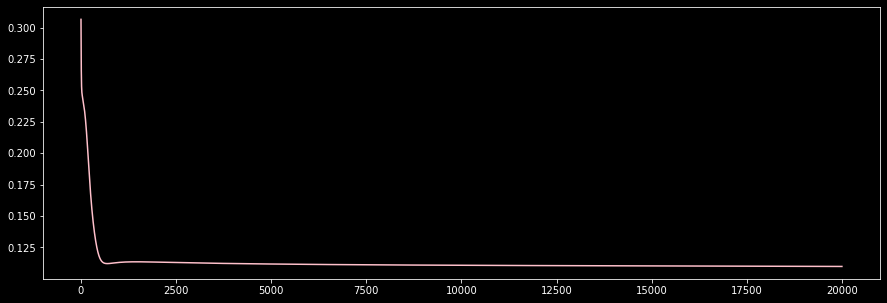

In [178]:
f,ax = plt.subplots(figsize=(15,5))
ax.plot(range(0,len(error_record)),error_record,color='pink')
plt.show()

### Params

### Layer 1

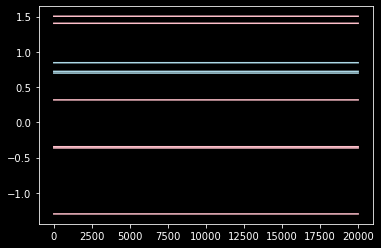

In [179]:
f ,ax = plt.subplots()

for k in range(0,2,1):# peso
    for j in range(0,3,1): # neurona
        W_temp = [[],[]]
        for i in range(len(W1_record)): # epoch
            W_temp[0].append(i)
            W_temp[1].append(W1_record[i][j,k])
        ax.plot(W_temp[0],W_temp[1],color='pink')
b1_record = np.array(b1_record).T
for i in range(3):
    ax.plot(range(0,b1_record[0][i].shape[0]),b1_record[0][i],color='lightblue')
plt.show()

### Layer 2

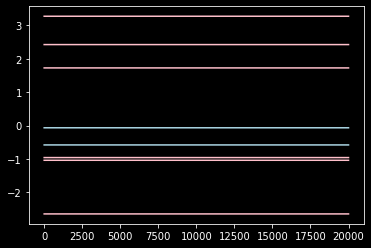

In [180]:
f ,ax = plt.subplots()

for k in range(0,3,1):# peso
    for j in range(0,2,1): # neurona
        W_temp = [[],[]]
        for i in range(len(W2_record)): # epoch
            W_temp[0].append(i)
            W_temp[1].append(W2_record[i][j,k])
        ax.plot(W_temp[0],W_temp[1],color='pink')
b2_record = np.array(b2_record).T
for i in range(2):
    ax.plot(range(0,b2_record[0][i].shape[0]),b2_record[0][i],color='lightblue')
plt.show()


### Layer 3

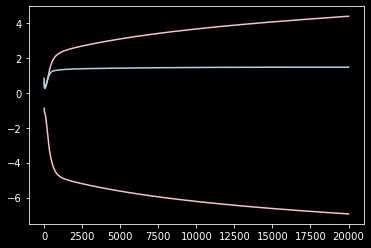

In [181]:
f ,ax = plt.subplots()

for k in range(0,2,1):# peso
    for j in range(0,1,1): # neurona
        W_temp = [[],[]]
        for i in range(len(W3_record)): # epoch
            W_temp[0].append(i)
            W_temp[1].append(W3_record[i][j,k])
        ax.plot(W_temp[0],W_temp[1],color='pink')
        
b3_record = np.array(b3_record).T
for i in range(1):
    ax.plot(range(0,b3_record[0][i].shape[0]),b3_record[0][i],color='lightblue')
plt.show()

# OOP v1

In [182]:
class Layer(object):
    '''

    '''
    def __init__(self,inputs,n_neurons,activation=sigmoid,layer_type=None):
        self.layer_type = layer_type
        self.inputs = inputs
        self.n_neurons = n_neurons
        self.activation = activation
        self.weights = np.random.uniform(-1,1,(n_neurons,inputs))
        self.bias = np.random.uniform(-1,1,(n_neurons,1))
    def _forward(self,X):
        self.X = X
        if self.layer_type == 'input':
            self.forward = self.activation(self.weights @ self.X.T + self.bias)
        else:
            self.forward = self.activation(self.weights @ self.X + self.bias)
    def _backpropagation(self,previouslayer,nextlayer,batch_size,Y=None,X=None):
        self.batch_size = batch_size
        if Y is not None: # output layer
            self.Y = Y
            self.error_propagator = -2*(self.Y - self.forward)
            self.next_layer_weights = np.eye(len(self.forward))
            self.next_layer_dZ = np.eye(len(self.forward))
        else: # hidden layers + input
            self.nextlayer = nextlayer
            self.next_layer_weights = self.nextlayer.weights
            self.next_layer_dZ = self.nextlayer.dZ
            self.error_propagator = 1
        if X is not None: #first layer
            self.previous_layer_output = X.T
        else: # hidden + output
            self.previouslayer = previouslayer
            self.previous_layer_output = self.previouslayer.forward
        self.dZ = (self.error_propagator
                  * (self.next_layer_weights.T @ self.next_layer_dZ)
                  * self.forward
                  * (1-self.forward) )
        self.dW = (1/self.batch_size)*self.dZ @ self.previous_layer_output.T
        self.db = (1/self.batch_size)*np.sum(self.dZ,axis=1,keepdims=1)
    def _updateparams(self,alpha=0.15):
        self.alpha = alpha
        self.weights = self.weights - self.alpha * self.dW
        self.bias = self.bias - self.alpha * self.db


In [183]:
class NeuralNetwork(object):
    def __init__(self):
        self.layers = []
    def _add_layer(self,layer):
        '''
        To be implemented: 
        Detector de dimensiones
        '''
        self.layers.append(layer)
    def train(self,X,Y,epochs=1000,batch_size=128,alpha=0.15):
        self.X = X
        self.Y = Y
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
        for epoch in range(self.epochs): # epoch
            for j in range(0,len(self.X),self.batch_size): # batch
                end = j+self.batch_size if j+self.batch_size <= len(self.X) else len(self.X)
                for i in range(len(self.layers)): # Forward
                    # Forward
                    if i == 0:
                        self.layers[i]._forward(self.X[j:end,:])
                    else:
                        self.layers[i]._forward(self.layers[i-1].forward)
                for k in range(len(self.layers),0,-1): # backpropagation y param update
                    i=k-1 # Porque arranca con k=LEN LAYERS que no existe, le resto 1
                    # backprop
                    # Segun que layer sea calcula un poquito diferente
                    if i == 0: # first layer
                        self.layers[i]._backpropagation(previouslayer=None
                                                        ,nextlayer=self.layers[i+1]
                                                        ,batch_size=self.batch_size
                                                        ,X=self.X[j:end,:])
                    elif i < (len(self.layers)-1): # hidden layers
                        self.layers[i]._backpropagation(previouslayer=self.layers[i-1]
                                                        ,batch_size=self.batch_size
                                                        ,nextlayer=self.layers[i+1])                        

                    else: # output layer
                        self.layers[i]._backpropagation(previouslayer=self.layers[i-1]
                                                        ,nextlayer=None
                                                        ,batch_size=self.batch_size
                                                        ,Y=self.Y[j:end])                        
                    # Update Layer params
                    self.layers[i]._updateparams(alpha=self.alpha)
                    
    def predict(self,X,predictproba=False):

        self.X = X
        for i in range(len(self.layers)):
            if i == 0:
                self.layers[i]._forward(self.X)
            else:
                self.layers[i]._forward(self.layers[i-1].forward)
        if predictproba == False:
            return self.layers[-1].forward > 0.5
        else:
            return self.layers[-1].forward
        

In [184]:
p1L1 = Layer(inputs=2,n_neurons=3,layer_type='input')
p1L2 = Layer(inputs=3,n_neurons=2)
p1L3 = Layer(inputs=2,n_neurons=1)
p1nn = NeuralNetwork()
p1nn._add_layer(L1)
p1nn._add_layer(L2)
p1nn._add_layer(L3)

In [188]:
p1nn.train(X=X,Y=y,epochs=20000,batch_size=200,alpha=0.15)

In [189]:
p1nn.layers[0].weights,p1nn.layers[1].weights,p1nn.layers[2].weights

(array([[ 5.54449854, -1.01605803],
        [ 6.52919817, -1.51076575],
        [-3.91235479, -4.03069104]]),
 array([[-5.39990789, -2.7044174 , -5.48167787],
        [-0.59836145, -5.48184896, -1.14462454]]),
 array([[-10.71598295,  -7.13642022]]))

In [187]:
W1,W2,W3

(array([[-0.3458827 ,  1.40448287],
        [ 0.31809865, -1.29887953],
        [-0.36333409,  1.50443058]]),
 array([[ 2.42292628, -2.643664  ,  1.72496861],
        [-0.95785485,  3.27085417, -1.03874704]]),
 array([[-6.93776087,  4.38032724]]))

## OOP v2

In [416]:
class Layer(object):
    '''

    '''
    def __init__(self,inputs,n_neurons,activation=sigmoid,layer_type=None):
        self.layer_type = layer_type
        self.activation = activation
        self.weights = np.random.uniform(-1,1,(n_neurons,inputs))
        self.bias = np.random.uniform(-1,1,(n_neurons,1))
    def _forward(self,X):
        if self.layer_type == 'input':
            self.forward = self.activation(self.weights @ X.T + self.bias)
        else:
            self.forward = self.activation(self.weights @ X + self.bias)
    def _backpropagation(self,previouslayer,nextlayer,batch_size,Y=None,X=None):
        #self.batch_size = batch_size
        if Y is not None: # output layer
            #self.Y = Y
            error_propagator = -2*(Y - self.forward)
            next_layer_weights = np.eye(len(self.forward))
            next_layer_dZ = np.eye(len(self.forward))
        else: # hidden layers + input
            #self.nextlayer = nextlayer
            next_layer_weights = nextlayer.weights
            next_layer_dZ = nextlayer.dZ
            error_propagator = 1
        if X is not None: #first layer
            previous_layer_output = X.T
        else: # hidden + output
            #self.previouslayer = previouslayer
            previous_layer_output = previouslayer.forward
        self.dZ = (error_propagator
                  * (next_layer_weights.T @ next_layer_dZ)
                  * self.forward
                  * (1-self.forward) )
        self.dW = (1/batch_size)*self.dZ @ previous_layer_output.T
        self.db = (1/batch_size)*np.sum(self.dZ,axis=1,keepdims=1)
    def _updateparams(self,alpha=0.15):
        #self.alpha = alpha
        self.weights = self.weights - alpha * self.dW
        self.bias = self.bias - alpha * self.db


In [429]:
class NeuralNetwork(object):
    def __init__(self):
        self.layers = []
    def _add_layer(self,layer):
        '''
        To be implemented: 
        Detector de dimensiones
        '''
        self.layers.append(layer)
    def train(self,X,Y,epochs=1000,batch_size=128,alpha=0.15,record_error=False):
        if record_error:
            self.record = []
        for epoch in range(epochs): # epoch
            
            for j in range(0,len(X),batch_size): # batch
                end = j+batch_size if j+batch_size <= len(X) else len(X)
                for i in range(len(self.layers)): # Forward
                    # Forward
                    if i == 0:
                        self.layers[i]._forward(X[j:end,:])
                    else:
                        self.layers[i]._forward(self.layers[i-1].forward)
                for k in range(len(self.layers),0,-1): # backpropagation y param update
                    i=k-1 # Porque arranca con k=LEN LAYERS que no existe, le resto 1
                    # backprop
                    # Segun que layer sea calcula un poquito diferente
                    if i == 0: # first layer
                        self.layers[i]._backpropagation(previouslayer=None
                                                        ,nextlayer=self.layers[i+1]
                                                        ,batch_size=batch_size
                                                        ,X=X[j:end,:])
                    elif i < (len(self.layers)-1): # hidden layers
                        self.layers[i]._backpropagation(previouslayer=self.layers[i-1]
                                                        ,batch_size=batch_size
                                                        ,nextlayer=self.layers[i+1])                        

                    else: # output layer
                        self.layers[i]._backpropagation(previouslayer=self.layers[i-1]
                                                        ,nextlayer=None
                                                        ,batch_size=batch_size
                                                        ,Y=Y[j:end])                        
                    # Update Layer params
                    self.layers[i]._updateparams(alpha=alpha)
            if record_error:
                self.record.append(np.mean(
                    (Y[j:end] - self.layers[-1].forward)**2))
            
                    
    def predict(self,X,predictproba=False):

        for i in range(len(self.layers)):
            if i == 0:
                self.layers[i]._forward(X)
            else:
                self.layers[i]._forward(self.layers[i-1].forward)
        if predictproba == False:
            return self.layers[-1].forward > 0.5
        else:
            return self.layers[-1].forward
        

In [430]:
L1 = Layer(inputs=2,n_neurons=3,layer_type='input')
L2 = Layer(inputs=3,n_neurons=2)
L3 = Layer(inputs=2,n_neurons=1)
nn = NeuralNetwork()
nn._add_layer(L1)
nn._add_layer(L2)
nn._add_layer(L3)

In [431]:
nn.train(X=X,Y=y,epochs=5000,batch_size=200,alpha=0.15,record_error=True)

In [432]:
len(nn.record)

5000

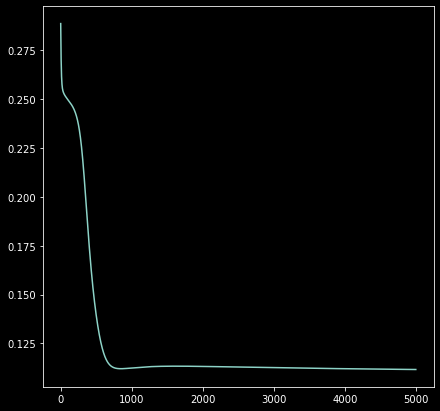

In [435]:
f,ax = plt.subplots(figsize=(7,7))
ax.plot(range(5000),nn.record)
plt.show()

## Comparo resultados de metodos

### Pesos

In [31]:
W1,W2,W3 # Metodo a mano

(array([[ 0.35754672, -1.21988409],
        [-0.47811099,  2.01850756],
        [ 0.48065308, -2.0660414 ]]),
 array([[-1.23904312,  2.14048423, -1.86130406],
        [ 0.84525004, -2.35362234,  2.48025322]]),
 array([[-3.93592916,  4.45403654]]))

In [32]:
p1nn.layers[0].weights,p1nn.layers[1].weights,p1nn.layers[2].weights # OOP 1

(array([[-0.55081645, -0.25527107],
        [-0.41795094,  1.53908927],
        [-0.45198727,  1.74538103]]),
 array([[ 0.408094  , -2.43924195, -3.78310908],
        [-0.092438  , -0.0474361 ,  1.27124421]]),
 array([[ 8.5203355 , -1.49558291]]))

In [37]:
nn.layers[0].weights,nn.layers[1].weights,nn.layers[2].weights # OOP 2

(array([[-0.50441706,  1.904395  ],
        [ 0.53900511, -2.35819876],
        [ 0.42934862, -1.79986497]]),
 array([[ 2.37313693, -2.44648994, -0.96621069],
        [ 1.59309937, -2.58726373, -1.80639467]]),
 array([[-3.84563501, -3.90939941]]))

### Performance

In [195]:
y_hat_mano = predict_a_mano(X_test)
y_hat_oop1 = p1nn.predict(X_test)
y_hat_oop2 = nn.predict(X_test)

In [339]:
print(metrics.classification_report(y_true=y_test,y_pred=y_hat_mano.T))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        87
         1.0       0.85      0.88      0.86        93

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.86       180
weighted avg       0.86      0.86      0.86       180



In [340]:
print(metrics.classification_report(y_true=y_test,y_pred=y_hat_oop1.T))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        87
         1.0       0.95      0.96      0.95        93

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180



In [341]:
print(metrics.classification_report(y_true=y_test,y_pred=y_hat_oop2.T))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        87
         1.0       0.95      0.96      0.95        93

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180



# Otra solución

In [197]:
clase1 = data[data[:,2]==1].copy()
clase0 = data[data[:,2]==0].copy()

meanx_1 = clase1[:,0].mean(axis=0)
clase1[:,0] = (clase1[:,0]-meanx_1)/np.std(clase1[:,0],axis=0)/np.abs(clase1[:,0]).max()

meanx_0 = clase0[:,0].mean(axis=0)
clase0[:,0] = (clase0[:,0]-meanx_0)/np.std(clase0[:,0],axis=0)/np.abs(clase0[:,0]).max()

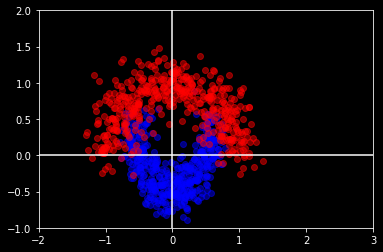

In [198]:
f,ax = plt.subplots()
ax.scatter(clase1[:,0],clase1[:,1],color='blue',alpha=0.5)
ax.scatter(clase0[:,0],clase0[:,1],color='red',alpha=0.5)
ax.set_xlim(-2,3)
ax.set_ylim(-1,2)

ax.axhline(y=0,xmin=-2,xmax=3)
ax.axvline(x=0,ymin=-1,ymax=2)

plt.show()

In [199]:
# Cambio de coordenadas
clase0_polar = np.array([np.sqrt(clase0[:,0]**2+clase0[:,1]**2),
                        np.rad2deg(np.arctan2(clase0[:,0],clase0[:,1]))])

In [200]:
clase1_polar = np.array([np.sqrt(clase1[:,0]**2+clase1[:,1]**2),
                        np.rad2deg(np.arctan2(clase1[:,0],clase1[:,1]))])

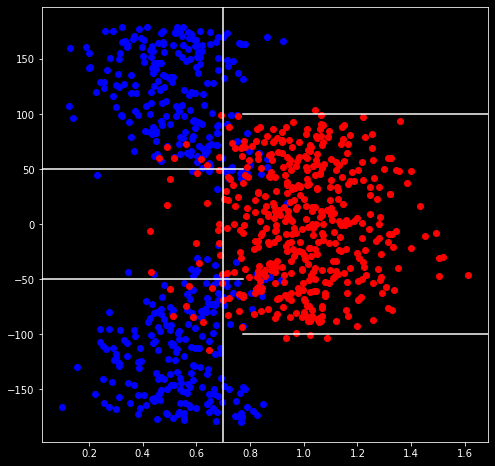

In [286]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(clase1_polar[0],clase1_polar[1],color='blue',zorder=2)
ax.scatter(clase0_polar[0],clase0_polar[1],color='red',zorder=2)

ax.axvline(x=0.70,ymin=-180,ymax=180)

ax.axhline(y=50,xmin=0,xmax=0.45)
ax.axhline(y=-50,xmin=0,xmax=0.45)

ax.axhline(y=100,xmin=0.45,xmax=1,zorder=3)
ax.axhline(y=-100,xmin=0.45,xmax=1,zorder=3)
plt.show()

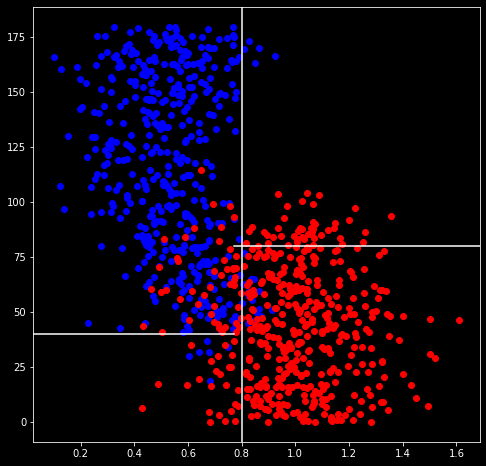

In [331]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(clase1_polar[0],np.abs(clase1_polar[1]),color='blue',zorder=2)
ax.scatter(clase0_polar[0],np.abs(clase0_polar[1]),color='red',zorder=2)

ax.axvline(x=0.8,ymin=-180,ymax=180)

ax.axhline(y=40,xmin=0,xmax=0.45)
#ax.axhline(y=-50,xmin=0,xmax=0.45)

ax.axhline(y=80,xmin=0.45,xmax=1,zorder=3)
#ax.axhline(y=-100,xmin=0.45,xmax=1,zorder=3)
plt.show()

In [335]:
def clasificacion_casera(x):
    #x_polar = np.array([np.sqrt(x[0]**2+x[1]**2),np.rad2deg(np.arctan2(x[0],x[1])) ])
    r = np.hypot(x[0],x[1])
    theta = np.abs(np.rad2deg(np.arctan2(x[0],x[1])))
    r_mask_70 = r < 0.8
    abs_theta_mask_100 = theta >= 90
    abs_theta_mask_50 = theta >= 40
    return (r_mask_70 & abs_theta_mask_50) | ((r_mask_70==False) & abs_theta_mask_100)

In [336]:
y_casero = clasificacion_casera(X_test.T)

In [337]:
metrics.accuracy_score(y_test,y_casero)

0.8222222222222222

Consigo una accuracy de 82% con un modelo completamente explicable.